In [1]:
from  SyntheticMicro import *
import numpy as np
from numpy import ndarray as Tensor
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
%matplotlib inline

## Model definition

In [2]:
mu : float = 0.0
interspec : float= 0.6
nodes_number : int= 28
interaction_probability :float = 0.1
#np.random.seed(12)

A_matrix : Tensor = ER_Eco_Net_Matrix(nodes_number, interaction_probability, interspec )
# This matrix will be "broadcasted" to all Ax columns
r_matrix : Tensor = np.random.uniform(0,1, nodes_number)

In [3]:

def SystemDynamics(  time , input_values ):
    """
    dx/dt = diag(x)[Ax+r]
    """
    A_m = A_matrix
    r_m = r_matrix
    diag_m = Diagonal_Matrix( np.array(input_values))

    left_product = np.matmul(A_m, np.array(input_values) ) + r_m

    dx =  np.matmul(diag_m,left_product.T).flatten()

    return dx.tolist()[0]

def GetFinalState(eq_solution):
    return eq_solution.y[:, -1].tolist()


def GetImageMatrix(species_number:int,T:int) -> Tensor:
    sol_flag :int = 0 
    states_container = []
    for k in range(species_number):
        while sol_flag == 0:
            initial_cond_ivp = Get_Random_Composition(species_number )
            ivp_sol = solve_ivp(SystemDynamics, (0,T), initial_cond_ivp, method='RK45')
            if ivp_sol.status != -1:
                sol_flag = 1
        sol_flag  = 0
        states_container.append(GetFinalState(ivp_sol))

    return np.array(states_container)


# Parameters test

## Initial Conditions

In [4]:
Get_Random_Composition(nodes_number )

[0.8054392729862209,
 0.8389755231186994,
 0.17300514769722508,
 0.0,
 0.3001731652674323,
 0.205478559843143,
 0.0,
 0.0,
 0.14769887107208723,
 0.0,
 0.06164471586272946,
 0.0,
 0.06896872096801143,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6318648124169155,
 0.7648796281713003,
 0.973065668849963,
 0.0,
 0.282364770257997,
 0.8445816754578935,
 0.0,
 0.8736613811526777]

In [5]:
ER_Eco_Net_Matrix(3, interaction_probability, interspec ) 

matrix([[-1.        ,  0.26106153, -0.99324507],
        [ 0.26838753, -1.        , -0.30418186],
        [ 0.05708034, -0.19323581, -1.        ]])

In [6]:
np.random.uniform(0,1, 3)

array([0.3330798 , 0.02574186, 0.7929698 ])

In [7]:
Diagonal_Matrix( np.array([4,5,6]))

array([[4., 0., 0.],
       [0., 5., 0.],
       [0., 0., 6.]])

# Actually solving the equations

It seems that the system get into stedy state for $ T = 100 $

In [27]:
T : int = 600

sol_flag : int = 0
    
while sol_flag == 0:
    initial_cond = Get_Random_Composition(nodes_number )
    solution1 = solve_ivp(SystemDynamics, (0,T), initial_cond, rtol = 1e-6, method='RK45'    )
    
    if solution1.status != -1:
        sol_flag = 1

print(solution1.message)

The solver successfully reached the end of the integration interval.


1022


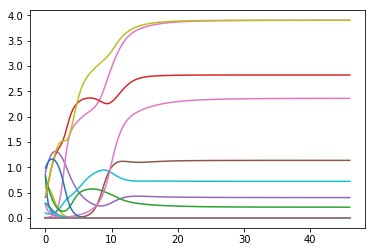

In [28]:
n_spec = solution1.y.shape[0]

print(len(solution1.t))

lim : int = round(len(solution1.t)*0.1)
for k in range(n_spec):

    plt.plot(solution1.t[0:lim], solution1.y[k,0:lim])

## Second try

In [10]:
T : int = 100
sol_flag : int = 0
    
while sol_flag == 0:
    initial_cond2 = Get_Random_Composition(nodes_number )
    solution2 = solve_ivp(SystemDynamics, (0,T), initial_cond2, rtol = 1e-6, method='RK45'    )
    
    print(solution2.status)
    print(solution2.message)
    
    if solution2.status != -1:
        sol_flag = 1


-1
Required step size is less than spacing between numbers.
-1
Required step size is less than spacing between numbers.
0
The solver successfully reached the end of the integration interval.


321


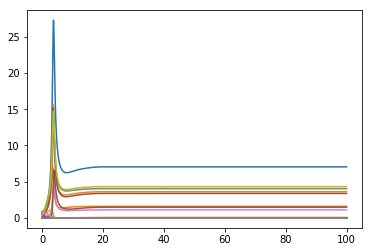

In [11]:
n_spec = solution2.y.shape[0]

print(len(solution2.t))

lim : int = round(len(solution2.t))
for k in range(n_spec):

    plt.plot(solution2.t[0:lim], solution2.y[k,0:lim])

['7.05', '1.60', '0.00', '0.00', '0.00', '0.00', '1.11', '4.04', '0.08', '0.00', '0.00', '3.61', '0.00', '0.00', '0.00', '3.38', '0.00', '0.00', '4.32', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.48', '0.00', '0.00']


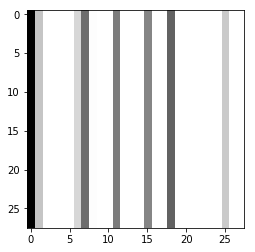

In [12]:
line_sol = solution2.y[:, -1]
two_decimals_sol = ["{:.2f}".format(value) for value in line_sol]
print( two_decimals_sol )

dummy_matrix = np.ones((28,28))*line_sol

# cmap="gray_r" shows 0 as white square
# cmap="gray" shows 0 as black square

plt.imshow(dummy_matrix, cmap="gray_r")

# Images from equation solutions

In [13]:
T   = 100
my_image = GetImageMatrix(28, T)

In [14]:
my_image.shape

(28, 28)

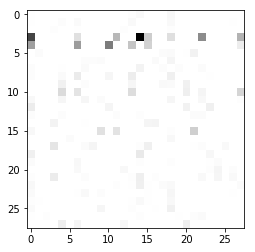

In [15]:
plt.imshow(my_image, cmap="gray_r")

In [16]:
T   = 100
my_image2 = GetImageMatrix(28, T)


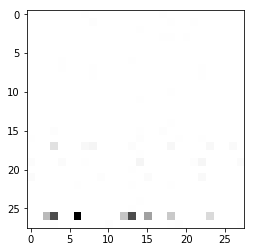

In [17]:
plt.imshow(my_image2, cmap="gray_r")

In [19]:
print(A_matrix[0:3,0:3])

[[-1.          0.48473537  0.43738013]
 [-1.07115162 -1.          0.67679653]
 [-0.99765304 -0.55536654 -1.        ]]
